In [1]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as rosa

In [2]:
root_dir = '/share/MSD'
metafiles_dir = osp.join(root_dir, 'AdditionalFiles')
tracks_dir = osp.join(root_dir, 'tracks')

In [3]:
# Less labels
ideal_df = pd.read_csv(osp.join(metafiles_dir, 'msd_tagtraum_cd2c.cls'),
                 sep='\t', header=None, names=['track_id', 'genre'], dtype={'track_id': str, 'genre': str})
#ideal_df

In [4]:
# More labels
ideal_df2 = pd.read_csv(osp.join(metafiles_dir, 'msd-topMAGD-genreAssignment.cls'),
                 sep='\t', header=None, names=['track_id', 'genre'], dtype={'track_id': str, 'genre': str})
#ideal_df2

In [66]:
#ideal_df_merged = ideal_df2.set_index('track_id').join(
#    ideal_df.set_index('track_id'),
#    how='inner',
#    lsuffix='_more',
#    rsuffix='_less')
#ideal_df_merged[ideal_df_merged['genre_more'] != ideal_df_merged['genre_less']]

In [67]:
# data = ideal_df.groupby('genre').size().reset_index(name='counts')
# print(data)
# plt.figure(figsize=(12, 8))
# plt.xticks(rotation=45)
# sns.barplot(x='genre', y='counts', data=data)
# plt.show()

            genre  counts
0           Blues    6836
1         Country   11772
2      Electronic   41075
3            Folk    5865
4   International   14242
5            Jazz   17836
6           Latin   17590
7         New Age    4010
8        Pop_Rock  238786
9             Rap   20939
10         Reggae    6946
11            RnB   14335
12          Vocal    6195


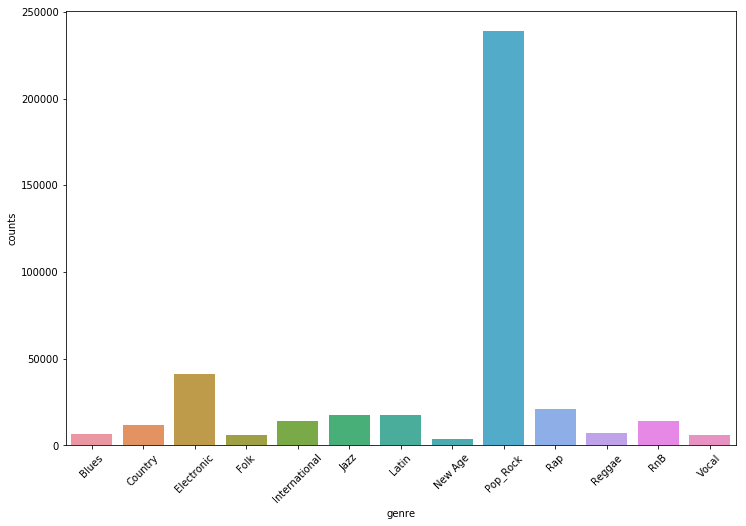

In [5]:
data = ideal_df2.groupby('genre').size().reset_index(name='counts')
print(data)
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.barplot(x='genre', y='counts', data=data)
plt.show()

In [10]:
track_ids = set([x.replace('.mp3', '') for x in os.listdir(tracks_dir)])
len(track_ids)

462794

In [11]:
data_df = ideal_df2[ideal_df2['track_id'].isin(track_ids)]
data_df

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock
5,TRAAAED128E0783FAB,Vocal
9,TRAAAFP128F931B4E3,Rap
11,TRAAAGW12903CC1049,Blues
12,TRAAAHD128F42635A5,Pop_Rock
13,TRAAAHE12903C9669C,Pop_Rock
14,TRAAAHJ128F931194C,Pop_Rock


            genre  counts
0           Blues    2799
1         Country    6823
2      Electronic   17282
3            Folk    2737
4   International    6594
5            Jazz    9445
6           Latin   10983
7         New Age    1443
8        Pop_Rock  109574
9             Rap    9583
10         Reggae    3355
11            RnB    8542
12          Vocal    3073


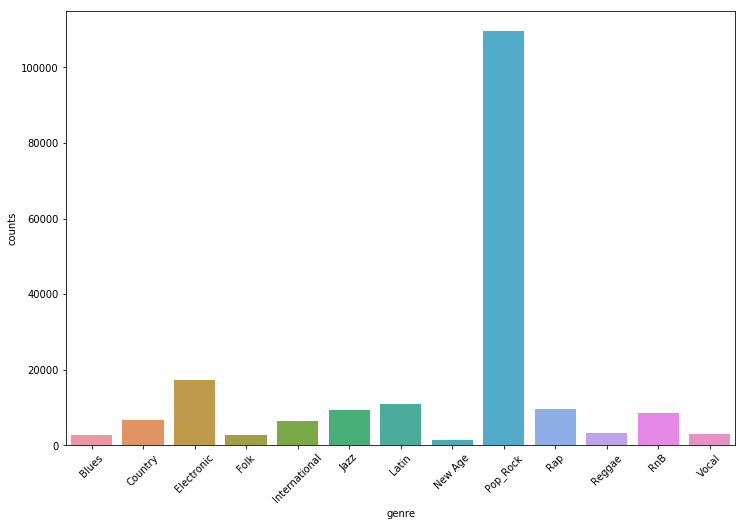

In [13]:
data = data_df.groupby('genre').size().reset_index(name='counts')
print(data)
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.barplot(x='genre', y='counts', data=data)
plt.show()

In [12]:
data_df2 = data_df.copy()
data_df2['genre'] = pd.factorize(data_df['genre'])[0]
data_df2.to_csv(osp.join(root_dir, 'dataset.csv'), index=False)

In [91]:
rosa.load(osp.join(root_dir, 'tracks', data_df2['track_id'][0]+'.mp3'

'TRAAAAK128F9318786'